# Data 4 Challenge: Analysis of the Compas data

### Step 1: Importing necessary libraries

In [88]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

### Step 2: Importing and preprocessing the dataset

In [46]:
compas_dataset = pd.read_csv("compas.csv")

In [47]:
compas_dataset

,case_number,first_name,last_name,sex,age,age_category,race,juvenile_felony_count,juvenile_misdemeanors_count,juvenile_other_count,...,charge_degree,offense_date,screening_date,jail_in,jail_out,type_of_assessment,score,score_text,is_recidivist,prediction
0,13011352CF10A,miguel,hernandez,Male,69,Greater than 45,Other,0,0,0,...,F,8/13/2013,8/14/2013,8/13/2013 6:03,8/14/2013 5:41,Risk of Recidivism,1,Low,0,0
1,13001275CF10A,kevon,dixon,Male,34,25 - 45,African-American,0,0,0,...,F,1/26/2013,1/27/2013,1/26/2013 3:45,2/5/2013 5:36,Risk of Recidivism,3,Low,1,0
2,13005330CF10A,ed,philo,Male,24,Less than 25,African-American,0,0,1,...,F,4/13/2013,4/14/2013,4/13/2013 4:58,4/14/2013 7:02,Risk of Recidivism,4,Low,1,0
3,13022355MM10A,marsha,miles,Male,44,25 - 45,Other,0,0,0,...,M,11/30/2013,11/30/2013,11/30/2013 4:50,12/1/2013 12:28,Risk of Recidivism,1,Low,0,0
4,14002304CF10A,edward,riddle,Male,41,25 - 45,Caucasian,0,0,0,...,F,2/18/2014,2/19/2014,2/18/2014 5:08,2/24/2014 12:18,Risk of Recidivism,6,Medium,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8845,14003651MM10A,carlos,vasquez,Male,44,25 - 45,Hispanic,0,0,0,...,M,3/3/2014,3/4/2014,3/3/2014 9:42,3/4/2014 9:23,Risk of Recidivism,1,Low,0,0
8846,13003941MM10A,rodrick,phillips,Male,63,Greater than 45,African-American,0,0,0,...,M,2/25/2013,2/27/2013,2/25/2013 9:20,2/26/2013 1:21,Risk of Recidivism,1,Low,1,0
8847,13013317CF10A,patrick,hamilton,Male,47,Greater than 45,Other,0,0,0,...,F,9/21/2013,9/22/2013,9/21/2013 4:06,9/22/2013 8:16,Risk of Recidivism,3,Low,0,0
8848,13009569MM10A,raymond,hernandez,Male,22,Less than 25,Caucasian,0,3,5,...,M,5/16/2013,5/17/2013,5/16/2013 8:58,5/18/2013 7:59,Risk of Recidivism,7,Medium,1,1


#### Encoding date as seperate numbers

In [48]:
compas_dataset["offense_date"] = pd.to_datetime(compas_dataset["offense_date"])
compas_dataset["offense_date_year"] = compas_dataset["offense_date"].dt.year
compas_dataset["offense_date_month"] = compas_dataset["offense_date"].dt.month
compas_dataset["offense_date_day"] = compas_dataset["offense_date"].dt.day

compas_dataset["screening_date"] = pd.to_datetime(compas_dataset["screening_date"])
compas_dataset["screening_date_year"] = compas_dataset["screening_date"].dt.year
compas_dataset["screening_date_month"] = compas_dataset["screening_date"].dt.month
compas_dataset["screening_date_day"] = compas_dataset["screening_date"].dt.day

compas_dataset["jail_in"] = pd.to_datetime(compas_dataset["jail_in"])
compas_dataset["jail_in_year"] = compas_dataset["jail_in"].dt.year
compas_dataset["jail_in_month"] = compas_dataset["jail_in"].dt.month
compas_dataset["jail_in_day"] = compas_dataset["jail_in"].dt.day

compas_dataset["jail_out"] = pd.to_datetime(compas_dataset["jail_out"])
compas_dataset["jail_out_year"] = compas_dataset["jail_out"].dt.year
compas_dataset["jail_out_month"] = compas_dataset["jail_out"].dt.month
compas_dataset["jail_out_day"] = compas_dataset["jail_out"].dt.day

compas_dataset

,case_number,first_name,last_name,sex,age,age_category,race,juvenile_felony_count,juvenile_misdemeanors_count,juvenile_other_count,...,offense_date_day,screening_date_year,screening_date_month,screening_date_day,jail_in_year,jail_in_month,jail_in_day,jail_out_year,jail_out_month,jail_out_day
0,13011352CF10A,miguel,hernandez,Male,69,Greater than 45,Other,0,0,0,...,13,2013,8,14,2013,8,13,2013,8,14
1,13001275CF10A,kevon,dixon,Male,34,25 - 45,African-American,0,0,0,...,26,2013,1,27,2013,1,26,2013,2,5
2,13005330CF10A,ed,philo,Male,24,Less than 25,African-American,0,0,1,...,13,2013,4,14,2013,4,13,2013,4,14
3,13022355MM10A,marsha,miles,Male,44,25 - 45,Other,0,0,0,...,30,2013,11,30,2013,11,30,2013,12,1
4,14002304CF10A,edward,riddle,Male,41,25 - 45,Caucasian,0,0,0,...,18,2014,2,19,2014,2,18,2014,2,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8845,14003651MM10A,carlos,vasquez,Male,44,25 - 45,Hispanic,0,0,0,...,3,2014,3,4,2014,3,3,2014,3,4
8846,13003941MM10A,rodrick,phillips,Male,63,Greater than 45,African-American,0,0,0,...,25,2013,2,27,2013,2,25,2013,2,26
8847,13013317CF10A,patrick,hamilton,Male,47,Greater than 45,Other,0,0,0,...,21,2013,9,22,2013,9,21,2013,9,22
8848,13009569MM10A,raymond,hernandez,Male,22,Less than 25,Caucasian,0,3,5,...,16,2013,5,17,2013,5,16,2013,5,18


#### Spliting dataset into features and two truth vectors

In [211]:
X = compas_dataset[["first_name","last_name","sex","age","age_category","juvenile_felony_count","juvenile_misdemeanors_count","juvenile_other_count","priors_count","charge_description","charge_degree","offense_date_year","offense_date_month","offense_date_day","screening_date_year","screening_date_month","screening_date_day","jail_in_year","jail_in_month","jail_in_day","jail_out_year","jail_out_month","jail_out_day"]].values
Y_real = compas_dataset[["is_recidivist"]]
Y_compas = compas_dataset[["prediction"]]



print(X[0])
print("Size of X: ",len(X))
print("Size of Y real: ",len(Y_real))
print("Size of Y compas: ",len(Y_compas))

['miguel' 'hernandez' 'Male' 69 'Greater than 45' 0 0 0 0
 'Aggravated Assault w/Firearm' 'F' 2013 8 13 2013 8 14 2013 8 13 2013 8
 14]
Size of X:  8850
Size of Y real:  8850
Size of Y compas:  8850


#### Encoding categorical features

In [212]:
label_encoder_X = LabelEncoder()
for i in range(len(X[0])):
    if(i in [0,1,2,4,9,10,24]):
        X[:,i] = label_encoder_X.fit_transform(X[:,i])
print(X[0])

[2137 1990 1 69 1 0 0 0 0 18 0 2013 8 13 2013 8 14 2013 8 13 2013 8 14]


#### Spliting dataset into train, validation and train sets

In [213]:
#Change the Y_real to Y_compus to change the truth dataset! Y_real -> real predictions, Y_compas -> predictions of the algorithm

X_train, X_extra, y_train, y_extra = train_test_split(X, Y_real, test_size = 0.33, random_state = 2020)
X_validation, X_test, y_validation, y_test = train_test_split(X_extra, y_extra, test_size = 0.5, random_state = 2020)

In [214]:
print("Train set: ",len(X_train))
print("Validation set: ",len(X_validation))
print("Test set: ",len(X_test))
print(X_train[0])

Train set:  5929
Validation set:  1460
Test set:  1461
[2707 4553 0 20 2 0 0 0 0 218 0 2014 12 22 2014 12 23 2014 12 22 2014 12
 23]


#### Scaling the features

In [215]:
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_validation = sc_X.transform(X_validation)
X_test = sc_X.transform(X_test)

In [216]:
print(X_train[0])

[ 1.21801829  1.56417384 -1.93277598 -1.2491085   1.67947466 -0.13285787
 -0.16527365 -0.22349544 -0.64382073  0.15661724 -0.77477884  0.68380323
  1.59053188  0.74712513  1.0418604   1.58139678  0.85562684  1.00899045
  1.59957377  0.74418829  0.84283454  1.58846512  0.84781638]


### Step 3: Training the algorithm

#### Cross-validation of parameters

In [217]:
scores = []
for i in range(-5,5):
    clf = LogisticRegression(penalty = "l1",solver = "liblinear", C = 10**i);
    clf.fit(X_train, y_train)
    
    score = clf.score(X_validation, y_validation)
    scores.append((score,i))
    print("Score: "+str(score)+ " C = "+str(10**i))

/Users/ivanlovrencic/Library/Python/3.7/lib/python/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ivanlovrencic/Library/Python/3.7/lib/python/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ivanlovrencic/Library/Python/3.7/lib/python/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ivanlovrencic/Library/Python/3.7/lib/python/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Score: 0.6582191780821918 C = 1e-05
Score: 0.6582191780821918 C = 0.0001
Score: 0.6582191780821918 C = 0.001
Score: 0.6842465753424658 C = 0.01
Score: 0.6876712328767123 C = 0.1
Score: 0.6863013698630137 C = 1
Score: 0.686986301369863 C = 10
Score: 0.686986301369863 C = 100
Score: 0.686986301369863 C = 1000


/Users/ivanlovrencic/Library/Python/3.7/lib/python/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ivanlovrencic/Library/Python/3.7/lib/python/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/ivanlovrencic/Library/Python/3.7/lib/python/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Score: 0.686986301369863 C = 10000


In [218]:
clf = LogisticRegression(penalty = "l1",solver = "liblinear", C = 10**scores[-1][1])
clf.fit(X_train,y_train)

score = clf.score(X_test,y_test)
y_pred = clf.predict(X_test)
print("Score: "+ str(score))

Score: 0.6844626967830253


/Users/ivanlovrencic/Library/Python/3.7/lib/python/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### Error analysis

In [228]:
font = {'family' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)

In [229]:
from sklearn.metrics import f1_score
print("F1 score:" + str(f1_score(y_test,y_pred)))

F1 score:0.40516129032258064


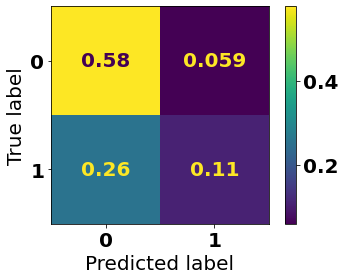

In [232]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(clf, X_test, y_test, normalize = "all")
plt.show()

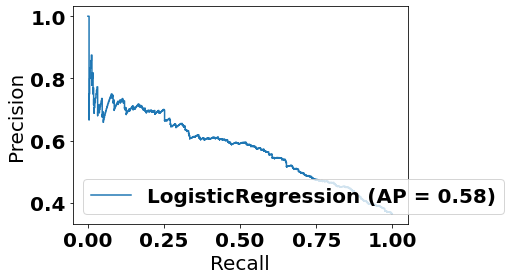

In [222]:
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(clf, X_test, y_test)
plt.show()

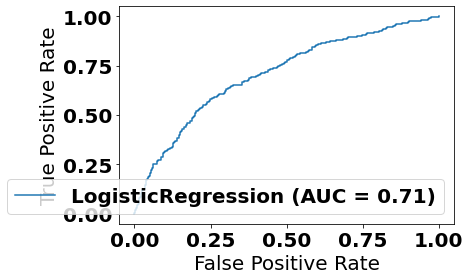

In [223]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(clf, X_test, y_test)
plt.show()

<BarContainer object of 23 artists>

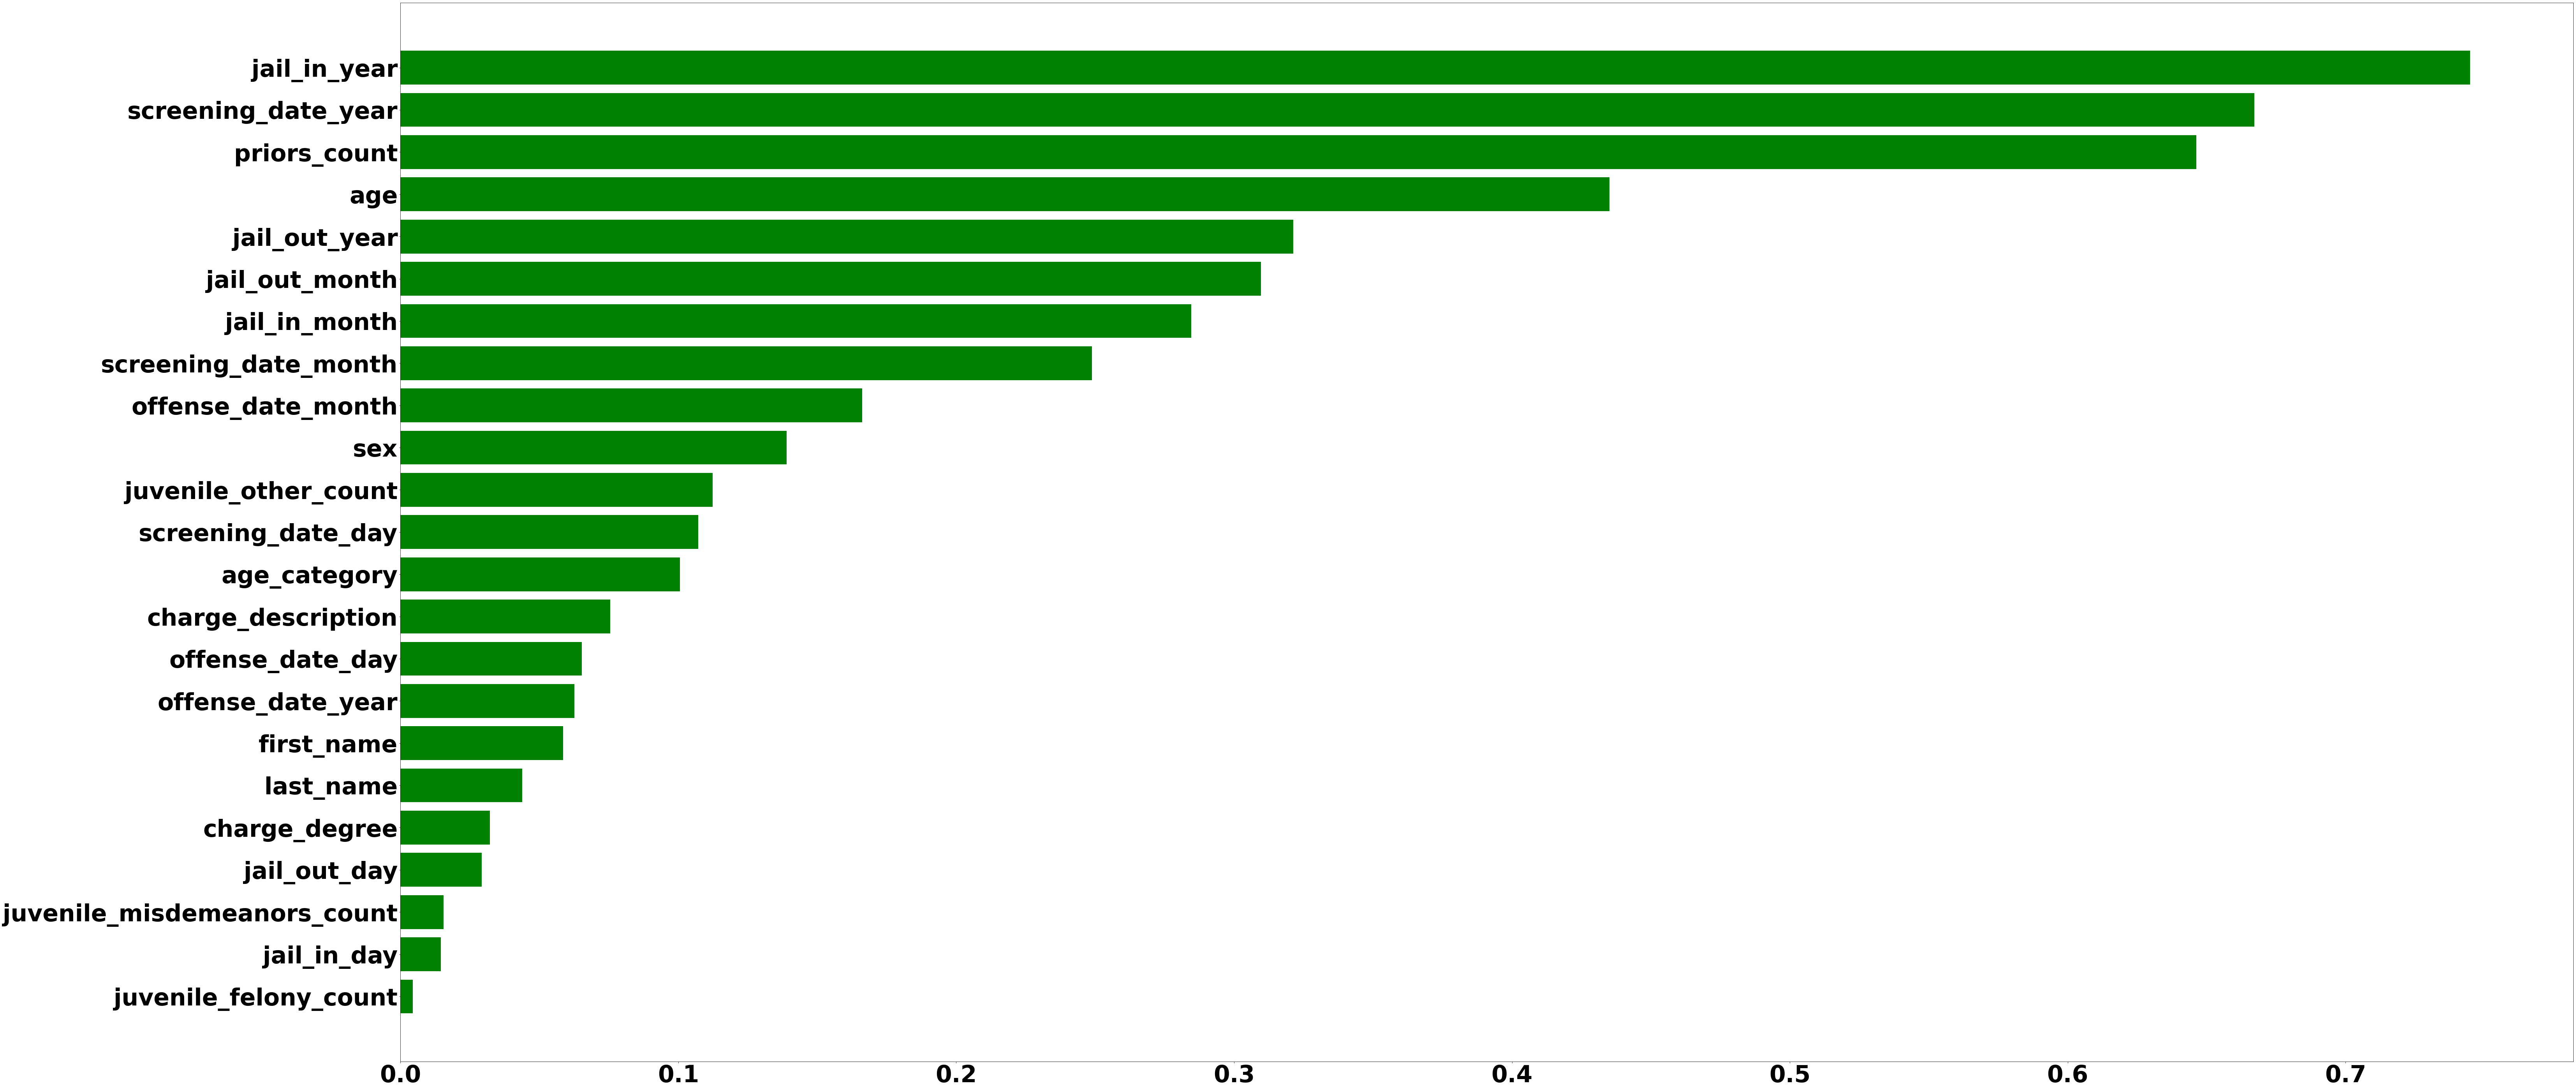

In [225]:
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(100, 50))

font = {'family' : 'normal',
        'size'   : 60}

matplotlib.rc('font', **font)

impact = dict()
features = ["first_name","last_name","sex","age","age_category","juvenile_felony_count","juvenile_misdemeanors_count","juvenile_other_count","priors_count","charge_description","charge_degree","offense_date_year","offense_date_month","offense_date_day","screening_date_year","screening_date_month","screening_date_day","jail_in_year","jail_in_month","jail_in_day","jail_out_year","jail_out_month","jail_out_day"]
values = abs(clf.coef_)[0]

for i in range(len(features)):
    impact[features[i]] = values[i]
    
impact = sorted(impact.items(), key=lambda x: x[1])

x = []
y = []
for i in range(len(impact)):
    x.append(impact[i][0])
    y.append(impact[i][1])

plt.barh(x, y, color ='green') 